In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk(r'C:\Users\Lenovo\Artificial Intelligence\tubes\kaggle'):
    for filename in filenames:
        print(os.path.join (dirname, filename))

# House Price Prediction 

### Fitur : 
1. Price : Harga rumah 
2. Area: Luas total rumah dalam meter persegi.
3. Bedrooms: Jumlah kamar tidur di dalam rumah.
4. Bathrooms: Jumlah kamar mandi di dalam rumah.
5. Stories: Jumlah lantai di dalam rumah.
6. Mainroad: Apakah rumah terhubung dengan jalan utama.
7. Guestroom: Apakah rumah memiliki ruang tamu.
8. Basement: Apakah rumah memiliki ruang bawah tanah.
9. Hot water heating: Apakah rumah memiliki sistem pemanas air panas.
10. Airconditioning: Apakah rumah memiliki sistem pendingin udara.
11. Parking: Jumlah ruang parkir yang tersedia di dalam rumah.
12. Prefarea: Apakah rumah tersebut terletak di area yang disukai.
13. Furnishing status: Status perabotan rumah

# Deskripsi Variabel

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Artificial Intelligence\tubes\kaggle\Housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Variabel numerik:**

* Price
* Area
* bedrooms
* stories
* parking

**Variabel kategorikal:**

* mainroad
* guestroom
* basement
* hotwaterheating
* airconditioning
* prefarea
* furnishingstatus

In [5]:
df.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Visualisasi Fitur Kategorikal

In [8]:
def bar_plot(variable):
    """
        input: variable ex: "Gender"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (7,2))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

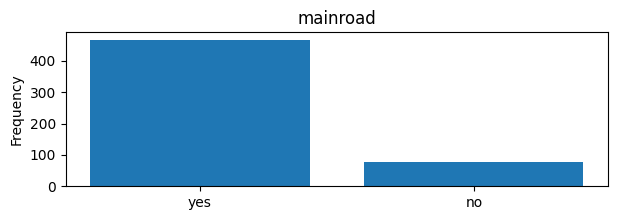

mainroad: 
 yes    468
no      77
Name: mainroad, dtype: int64


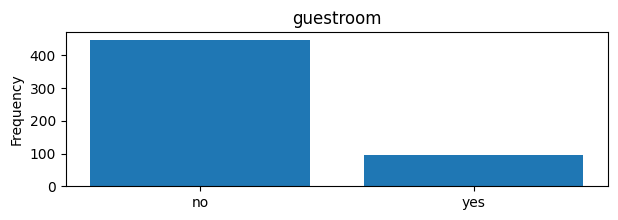

guestroom: 
 no     448
yes     97
Name: guestroom, dtype: int64


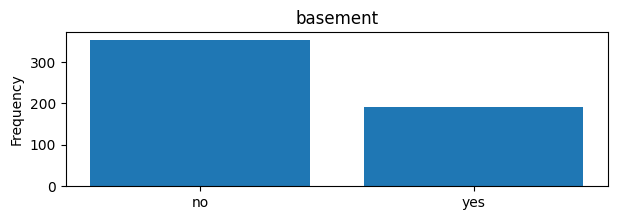

basement: 
 no     354
yes    191
Name: basement, dtype: int64


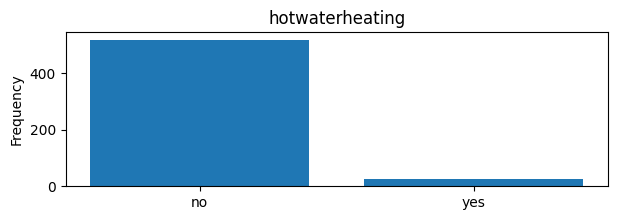

hotwaterheating: 
 no     520
yes     25
Name: hotwaterheating, dtype: int64


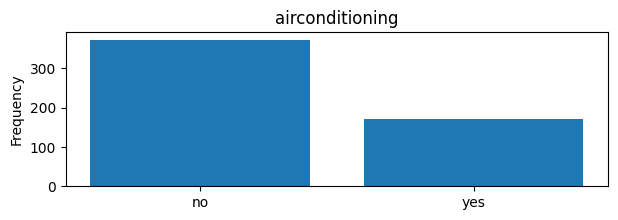

airconditioning: 
 no     373
yes    172
Name: airconditioning, dtype: int64


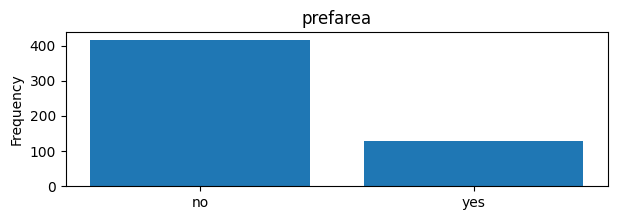

prefarea: 
 no     417
yes    128
Name: prefarea, dtype: int64


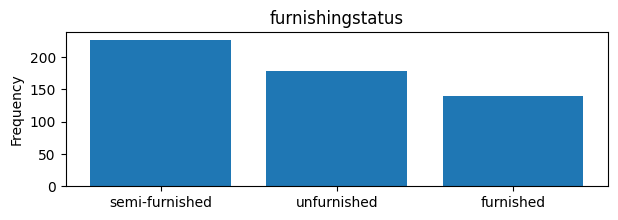

furnishingstatus: 
 semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [10]:
category1 = ["mainroad","guestroom","basement","hotwaterheating","airconditioning", "prefarea", "furnishingstatus"]
for c in category1:
    bar_plot(c)

# Distribusi Nilai Numerik

In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram plot.".format(variable))
    plt.show()

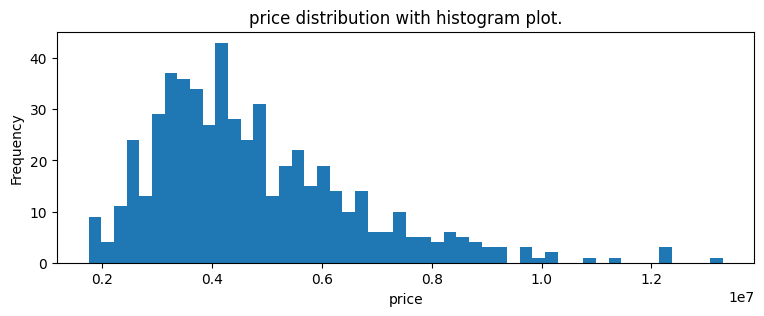

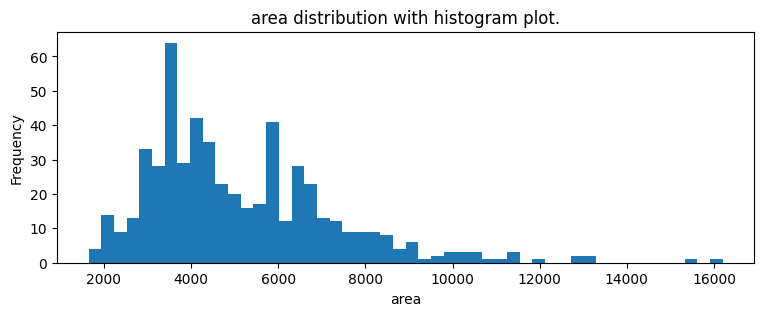

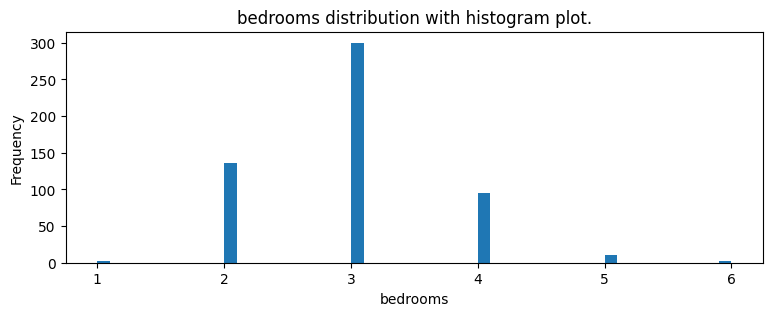

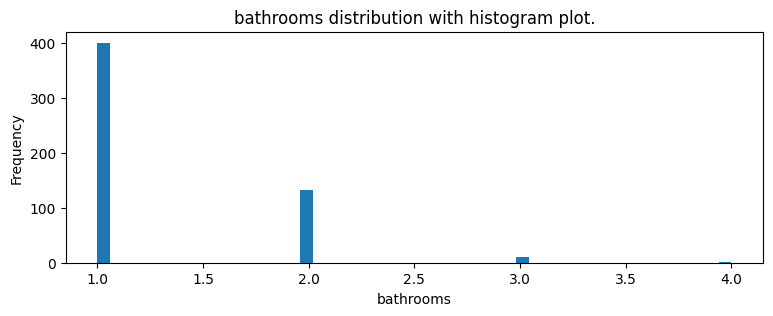

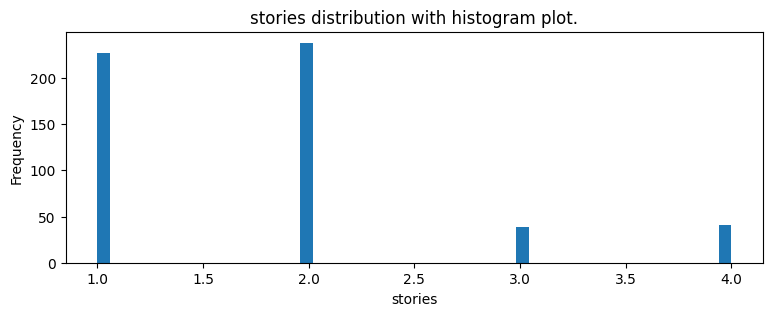

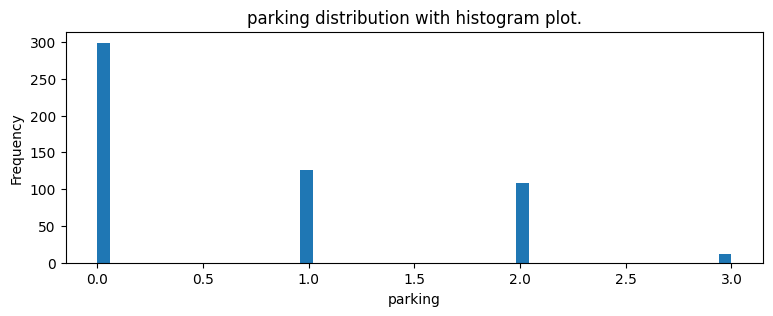

In [12]:
numericVar = ["price","area","bedrooms", "bathrooms", "stories", "parking"]
for n in numericVar:
    plot_hist(n)

# Data Analysis

In [13]:
df[["price","mainroad"]].groupby(["mainroad"], as_index = False).mean().sort_values(by="mainroad",ascending = False)

,mainroad,price
1,yes,4.991777e+06
0,no,3.398905e+06


In [21]:
df[["price","guestroom"]].groupby(["guestroom"], as_index = False).mean().sort_values(by="guestroom",ascending = False)

,guestroom,price
1,yes,5.792897e+06
0,no,4.514701e+06


In [22]:
df[["price","basement"]].groupby(["basement"], as_index = False).mean().sort_values(by="basement",ascending = False)

,basement,price
1,yes,5.242615e+06
0,no,4.471954e+06


In [23]:
df[["price","hotwaterheating"]].groupby(["hotwaterheating"], as_index = False).mean().sort_values(by="hotwaterheating",ascending = False)

,hotwaterheating,price
1,yes,5.559960e+06
0,no,4.703607e+06


In [24]:
df[["price","airconditioning"]].groupby(["airconditioning"], as_index = False).mean().sort_values(by="airconditioning",ascending = False)

,airconditioning,price
1,yes,5.976748e+06
0,no,4.175923e+06


In [25]:
df[["price","prefarea"]].groupby(["prefarea"], as_index = False).mean().sort_values(by="prefarea",ascending = False)

,prefarea,price
1,yes,5.879046e+06
0,no,4.392650e+06


In [26]:
df[["price","furnishingstatus"]].groupby(["furnishingstatus"], as_index = False).mean().sort_values(by="furnishingstatus",ascending = False)

,furnishingstatus,price
2,unfurnished,3.979164e+06
1,semi-furnished,4.907524e+06
0,furnished,5.447104e+06


# Outlier Detection

In [14]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [15]:
df.loc[detect_outliers(df,["price","area","bedrooms", "bathrooms", "stories", "parking"])]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [17]:
#Let's drop them.
df = df.drop(detect_outliers(df,["price","area","bedrooms", "bathrooms", "stories", "parking"]),axis = 0).reset_index(drop=True)

# Data Visualization

Visualisasi data adalah proses merepresentasikan data dalam format visual, seperti bagan, grafik, atau peta, untuk memfasilitasi pemahaman, analisis, dan komunikasi informasi yang kompleks. Ini melibatkan transformasi data mentah menjadi representasi visual yang bermakna yang dapat mengungkapkan pola, tren, dan wawasan yang mungkin sulit untuk dilihat dari angka mentah saja. Dengan memanfaatkan isyarat visual seperti warna, bentuk, dan ukuran, visualisasi data membantu menyederhanakan kumpulan data yang rumit, sehingga memudahkan individu untuk memahami pesan utama dan membuat keputusan berdasarkan data. Ini memainkan peran penting dalam berbagai bidang, termasuk bisnis, sains, jurnalisme, dan akademisi, memungkinkan pengguna menjelajahi data, mengidentifikasi korelasi, mendeteksi anomali, dan menyajikan temuan dengan cara yang menarik secara visual. Pada akhirnya, visualisasi data memberdayakan individu untuk membuka nilai data dan mendapatkan perspektif baru tentang informasi yang mereka kerjakan.

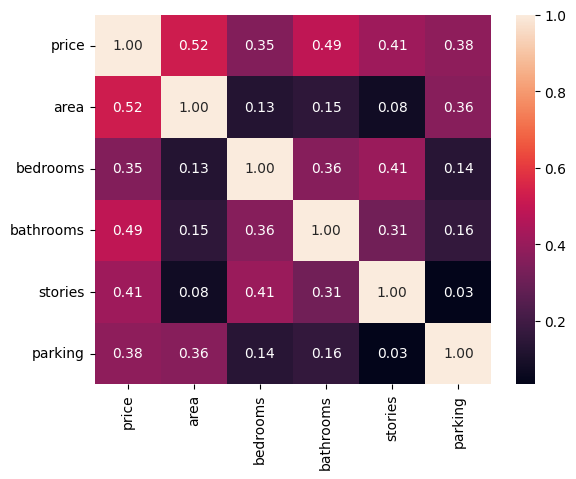

In [18]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

In [27]:
#Label encoding the Smoking History feature.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["mainroad"] = le.fit_transform(df["mainroad"])

In [29]:
df["mainroad"].value_counts()

1    466
0     77
Name: mainroad, dtype: int64

In [30]:
df["guestroom"] = le.fit_transform(df["guestroom"])
df["guestroom"].value_counts()

0    446
1     97
Name: guestroom, dtype: int64

In [31]:
df["basement"] = le.fit_transform(df["basement"])
df["basement"].value_counts()

0    352
1    191
Name: basement, dtype: int64

In [32]:
df["hotwaterheating"] = le.fit_transform(df["hotwaterheating"])
df["hotwaterheating"].value_counts()

0    518
1     25
Name: hotwaterheating, dtype: int64

In [33]:
df["airconditioning"] = le.fit_transform(df["airconditioning"])
df["airconditioning"].value_counts()

0    372
1    171
Name: airconditioning, dtype: int64

In [34]:
df["prefarea"] = le.fit_transform(df["prefarea"])
df["prefarea"].value_counts()

0    415
1    128
Name: prefarea, dtype: int64

In [35]:
df["furnishingstatus"] = le.fit_transform(df["furnishingstatus"])
df["furnishingstatus"].value_counts()

1    227
2    177
0    139
Name: furnishingstatus, dtype: int64

In [36]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
2,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
3,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
4,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
5,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
6,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
7,9800000,5750,3,2,4,1,1,0,0,1,1,1,2
8,9800000,13200,3,1,2,1,0,1,0,1,2,1,0
9,9681000,6000,4,3,2,1,1,1,1,0,2,0,1


# Modeling

In [37]:
X_data = df.drop(labels = "price", axis = 1)
y = df["price"]

In [38]:
#Normalization
x = (X_data - np.min(X_data))/(np.max(X_data)-np.min(X_data))

In [39]:
#Importing libraries.
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score

In [41]:
#Manuplating our dataset for train and test seperation.
X_train = df.drop(labels = "price", axis = 1)
y_train = df["price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print("X Train: ",len(X_train))
print("X Test: ",len(X_test))
print("y Train: ",len(y_train))
print("y Test: ",len(y_test))

X Train:  434
X Test:  109
y Train:  434
y Test:  109


In [43]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:06<00:00,  6.92it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.61,0.66,1263526.07,0.30
LGBMRegressor,0.60,0.65,1281544.25,0.08
PoissonRegressor,0.59,0.63,1306998.52,0.01
GradientBoostingRegressor,0.58,0.63,1318307.71,0.05
TransformedTargetRegressor,0.58,0.62,1320333.14,0.00
LinearRegression,0.58,0.62,1320333.14,0.01
LassoLarsIC,0.58,0.62,1320333.14,0.01
LarsCV,0.58,0.62,1320333.14,0.02
Lars,0.58,0.62,1320333.14,0.01
